# Analysis of ACTIV trace data for checking concordance between illumina and ONT

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline  

In [3]:



testset_activ = pd.read_csv("/Users/migunshakya/Projects/COVID19/ACTIV-TRACE-analysis/data/ONT_Illumina_TRACE_test_set.csv", sep=",")
def primer_info(row):
    """Function to get primer information"""
    if "CoronaHiT" in row['attributes']:
        return "ARTIC-V3"
    elif "artic_primer_version_exp: 3" in row["attributes"]:
        return "ARTIC-V3"
    elif "RANDOM" in row["libraryselection"]:
        return "RANDOM"
    elif row["acc"] in ["SRR11397720", "SRR11397724", "SRR11397723", "SRR11397719", "SRR11397722", "SRR11397718", "SRR11410540", "SRR11410539", "SRR11410538", 
"SRR11410537", "SRR11547279",
"SRR11542244"]:
        return "ARTIC-V1"
    elif row["bioproject"] in ["PRJNA627229"]:
        return "ARTIC-V1"
    elif row["bioproject"] in ["PRJNA650037"]:
        return "ARTIC-V3"
    elif row["bioproject"] in ["PRJNA707211"]:
        return "Tiled-ClickSeq"
    elif row["bioproject"] in ["PRJNA628662"]:
        return "ARTIC-V3"
    else:
        return "unknown"
testset_activ['primer_info'] = testset_activ.apply(primer_info, axis=1 )
testset_activ.head()

,acc,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,primer_info
0,ERR5505783,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,SINGLE,PCR,VIRAL RNA,bases: 15790321\nena_first_public_sam: 2020-07...,ARTIC-V3
1,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...,ARTIC-V3
2,ERR4365002,SAMEA7080096,OXFORD_NANOPORE,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,SINGLE,PCR,VIRAL RNA,bases: 897417562\nbroker_name_sam: COVID-19 Ge...,ARTIC-V3
3,ERR5515580,SAMEA7080256,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,SINGLE,PCR,VIRAL RNA,ena_first_public_sam: 2020-07-22\nhost_scienti...,ARTIC-V3
4,ERR4365241,SAMEA7080256,OXFORD_NANOPORE,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,SINGLE,PCR,VIRAL RNA,assemblyname: assembly\nbytes: 1596883913\nhos...,ARTIC-V3


Number of SRRs = 412

Number of biosample = 154

Number of bioprojects = 9

Library selection methods = ["PCR", "Random", "RT-PCR"]

Number of sequencing centers = 12

ARTIC v3 protocols = 296

ARTIC v1 protocols = 22

RANDOM protocol = 76

Tiled-ClickSeq = 18

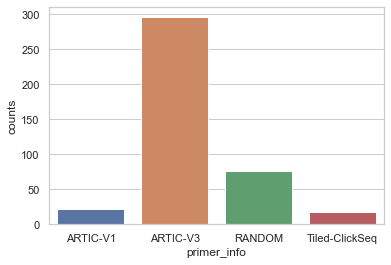

In [4]:
primer_count_df = testset_activ.groupby('primer_info').count()
primer_count_df.columns = ['counts', 'biosample', 'platform', 'bioproject', 'center_name',
       'librarylayout', 'libraryselection', 'librarysource', 'attributes']
primer_count_df['primer_info'] = primer_count_df.index
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="primer_info", y="counts", data=primer_count_df)

In [5]:

def bases_info(row):
    """Function to get number of bases"""
    if "bases" in row['attributes']:
        print(row["attributes"])
        matched_str = re.findall('bases.*\n', row["attributes"])
        # print(matched_str)
        return matched_str
    else:
        return None
testset_activ['bases'] = testset_activ.apply(bases_info, axis=1)
testset_activ['bases'] = testset_activ['bases'].apply(lambda x: x[0], axis=1)
testset_activ


bases: 15790321
ena_first_public_sam: 2020-07-22
host_common_name_sam: not provided
title_sam: COG-UK/PHWC-1655BE
primary_search: PRJEB37886
geographic_location__region_and_locality__sam: Wales
sra_accession_sam: ERS4840694
insdc_status_sam: public
isolate_sam: not provided
primary_search: 629258
primary_search: ERR5505783
bytes: 2739308
collecting_institution_sam: Originating lab: Wales Specialist Virology Centre Sequencing lab: Pathogen Genomics Unit
external_id_sam: SAMEA7080096
insdc_center_alias_sam: Originating lab: Wales Specialist Virology Centre Sequencing lab: Pathogen Genomics Unit
virus_identifier_sam: not provided
primary_search: 15628674
primary_search: ERP121228
primary_search: ERX5286666
primary_search: SAMEA7080096
collector_name_sam: not provided
ena_last_update_sam: 2020-07-22
host_scientific_name_sam: Homo sapiens
insdc_last_update_sam: 2020-07-22T01:15:51Z
artic_primer_version_exp: 3
collection_date_sam: 2020-06-19
host_sex_sam: not provided
insdc_center_name_sam: 

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [6]:
ont_ill_activ = pd.read_csv("/Users/migunshakya/Projects/COVID19/ACTIV-TRACE-analysis/data/ONT_Illumina_TRACE_test_result_with_metadata.txt", sep="\t")
ont_ill_activ.head()

,Group_Name,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,ec-19_run_with_primer_trim
0,LANL,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
1,LANL,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
2,LANL,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
3,LANL,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
4,LANL,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3


In [44]:
count_snps = ont_ill_activ.groupby(['bioproject','biosample', 'Accession']).count()[['Pos']]
count_snps.reset_index(inplace=True)
count_snps
# sns.barplot(x="Accession", y="Pos", data=count_snps, hue="biosample" )

,bioproject,biosample,Accession,Pos
0,PRJEB37886,SAMEA7080096,ERR4364963,14
1,PRJEB37886,SAMEA7080096,ERR4365002,23
2,PRJEB37886,SAMEA7080096,ERR5505783,15
3,PRJEB37886,SAMEA7080256,ERR4365125,27
4,PRJEB37886,SAMEA7080256,ERR4365241,35
...,...,...,...,...
383,PRJNA707211,SAMN18188239,SRR13870682,11
384,PRJNA707211,SAMN18188240,SRR13870633,14
385,PRJNA707211,SAMN18188240,SRR13870646,8
386,PRJNA707211,SAMN18188240,SRR13870668,11


In [60]:
def check_sim(row):
    return len(set(row['Pos'].to_list()))

    
# count_snps.apply(check_sim, axis=1)
x = count_snps.groupby(['bioproject','biosample']).apply(check_sim)
print(x)
# ont_ill_activ.groupby(['bioproject','biosample', 'Accession']).count()

bioproject   biosample   
PRJEB37886   SAMEA7080096    3
             SAMEA7080256    3
             SAMEA7080329    2
             SAMEA7080342    2
             SAMEA7080380    2
                            ..
PRJNA707211  SAMN18188234    4
             SAMN18188237    4
             SAMN18188238    4
             SAMN18188239    3
             SAMN18188240    3
Length: 150, dtype: int64


In [79]:
y = pd.DataFrame(x).reset_index()
y.columns = ["bioproject", "biosample", "differences"]
y
# sns.barplot(pd.DataFrame(x))

,bioproject,biosample,differences
0,PRJEB37886,SAMEA7080096,3
1,PRJEB37886,SAMEA7080256,3
2,PRJEB37886,SAMEA7080329,2
3,PRJEB37886,SAMEA7080342,2
4,PRJEB37886,SAMEA7080380,2
...,...,...,...
145,PRJNA707211,SAMN18188234,4
146,PRJNA707211,SAMN18188237,4
147,PRJNA707211,SAMN18188238,4
148,PRJNA707211,SAMN18188239,3


<AxesSubplot:xlabel='biosample', ylabel='differences'>

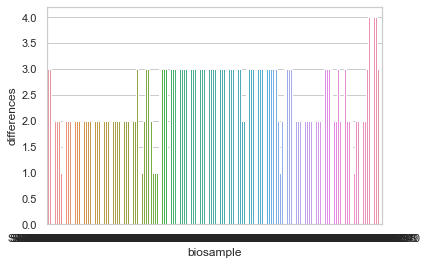

In [80]:
sns.barplot(x="biosample", y="differences", data=y)